In [43]:
# The Laplace transform (and the Laplacian filter, in the context of image processing)
# is primarily used to emphasize the edges and details within an image by detecting areas of rapid intensity change.
# Here's how we can demonstrate the utility of the Laplace transform (or Laplacian filter) in image processing:

# Key Applications of Laplacian Transform in Image Processing:

# Edge Detection:
# Purpose: The Laplacian filter highlights regions of rapid intensity changes, which correspond to edges in an image. 
# The Laplacian operator calculates the second derivative, emphasizing areas where the intensity changes most rapidly.
# Demonstration: After applying the Laplacian, you can observe the edges of objects more clearly, 
# as the regions with high contrast (edges) will appear more prominent in the transformed image.
# Example: By comparing the original image to the Laplacian-transformed image, you can see how the filter detects 
# boundaries between different regions (e.g., where colors or intensities change significantly). 
# This is useful in object detection, shape recognition, and boundary delineation.

# Image Enhancement:
# Purpose: The Laplacian operator can be used to enhance fine details and contours in an image. 
# It helps to make the edges sharper by emphasizing transitions between regions.
# Demonstration: When applied to an image, it can make the borders of objects more defined, improving visibility 
# in areas where the contrast is low.
# Example: You can compare the original image with the Laplacian-filtered image and observe how edges become clearer 
# and more prominent. This enhancement is useful in tasks such as medical image analysis or satellite image interpretation, 
# where detecting fine details is critical.

# Noise Reduction in Edge Detection:
# Purpose: By isolating the second derivative of an image, Laplacian transforms help detect areas where the image exhibits significant changes (edges). 
# While edges are highlighted, some forms of noise (especially high-frequency noise) can also be reduced by smoothing the image beforehand.
# Demonstration: You can apply the Laplacian to a noisy image and see how the filter can still detect edges while suppressing the impact of the noise.
# Example: For an image with random noise, the Laplacian can help focus on the main structural edges, ignoring the pixel-to-pixel noise variations. 
# This is particularly useful when combined with pre-smoothing techniques (like Gaussian smoothing) for cleaner edge detection.

# Object Detection:
# Purpose: The Laplacian operator can aid in detecting objects in an image by focusing on their edges. 
# By applying the filter to different images, we can highlight the boundaries of different objects, making them easier to isolate.
# Demonstration: In images with well-defined objects, applying the Laplacian operator will show you the boundaries of the objects more clearly. 
# You can perform tasks like object recognition and tracking based on the sharpness and presence of edges.
# Example: For images containing multiple objects, the Laplacian helps isolate the boundaries of each object. 
# You could then apply further processing to count, classify, or track these objects based on their edge characteristics.

# Image Segmentation:
# Purpose: The Laplacian transform can be used for image segmentation, where an image is divided into segments based on edges. 
# The detected edges can help in grouping regions of an image that have similar properties or are part of the same object.
# Demonstration: After applying the Laplacian, the segmented regions (formed by edges) can be used to separate objects or regions of interest.
# Example: In a scene with various objects (e.g., cars, trees), Laplacian filtering can enhance the contrast between regions, making it easier to 
# segment the image into meaningful areas for further analysis.

# Feature Extraction:
# Purpose: The Laplacian can be used as a feature extraction tool for machine learning and computer vision tasks. 
# The edges highlighted by the Laplacian filter can serve as important features for tasks such as image classification or facial recognition.
# Demonstration: After applying the Laplacian filter, you can extract features (like the locations of sharp edges) and use these for downstream tasks such as classification or recognition.
# Example: When used for facial recognition, the edges of facial features (e.g., eyes, nose, mouth) can be detected and used as key features to identify individuals.

# Visualizing Frequency Content:
# Purpose: The Laplacian filter emphasizes high-frequency components in an image. High-frequency components often correspond to fine details and edges 
# in the image, whereas low-frequency components correspond to smoother areas.
# Demonstration: By applying the Laplacian, you can isolate the high-frequency content of an image, which is useful in various analytical and diagnostic tasks.
# Example: In images that represent patterns or textures, applying the Laplacian will help visualize the rapid changes within these patterns, enhancing the texture details 
# and allowing for more precise analysis.

# Visualization Ideas with Laplacian Transform:

# Compare Edge Detection Results:
# Before and After: Compare the original image with the Laplacian-transformed image. This will help you see how the filter highlights the edges and transitions 
# between different regions in the image.

# Combine Laplacian with Other Filters:
# Combination: Combine the Laplacian filter with smoothing filters (like Gaussian blur) to show the difference in edge detection quality with and without noise reduction. 
# This can be useful in noisy environments or low-quality images.

# Use Laplacian for Object Detection:
# Apply Laplacian edge detection to images with multiple objects and observe how it can detect object boundaries. 
# You can then highlight the segmented regions and label them as different objects.

# Demonstrate Noise and Detail Enhancement:
# Before Noise: Show how the Laplacian emphasizes edges in the original image.
# After Noise: Add noise to the image and then apply the Laplacian. The noise might affect the results, but you can visually demonstrate how the filter 
# tries to extract meaningful edge information despite the noise.

# Practical Demonstrations:

# Medical Imaging: Laplacian can be used to detect anomalies (e.g., tumors, fractures) in medical scans (like X-rays or MRIs) by emphasizing the edges around those anomalies.
# Autonomous Vehicles: In self-driving car systems, the Laplacian filter can be used to detect lane boundaries, signs, and other road features by emphasizing edges in the video feed.
# Satellite Imaging: Laplacian filters help in detecting boundaries of landforms, buildings, or rivers in satellite images, which can then be used for urban planning or environmental monitoring.

# Conclusion:
# In summary, the Laplacian transform is useful for enhancing the edge information in an image. It plays a crucial role in image processing tasks like edge detection, 
# noise reduction, feature extraction, object detection, and segmentation. By demonstrating the applications listed above, you can visualize how the Laplacian filter 
# can help in various computer vision tasks and improve the clarity and structure of images.


In [39]:
import numpy as np
import cv2

# Original R channel of the image (3x3)
r_channel = np.array([
    [255, 0, 0],
    [255, 0, 255],
    [128, 64, 32]
], dtype=np.float32)

# Laplacian kernel (3x3)
laplacian_kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], dtype=np.float32)

# Apply zero padding to the R channel (pad with zeros)
padded_r = np.pad(r_channel, pad_width=1, mode='constant', constant_values=0)

# Function to manually apply the Laplacian filter to a channel (Including Borders)
def apply_laplacian(channel, kernel):
    height, width = channel.shape
    result = np.zeros_like(channel, dtype=np.float32)  # Ensure the result is of the correct type

    # Iterate over all pixels (including borders)
    for i in range(height):
        for j in range(width):
            # Apply the kernel to the 3x3 region around the pixel (considering padding)
            region = padded_r[i:i+3, j:j+3]
            result[i, j] = np.sum(region * kernel)
    
    return result

# Apply the manual Laplacian filter
manual_laplacian_r = apply_laplacian(r_channel, laplacian_kernel)

# OpenCV Laplacian (using filter2D)
laplacian_cv_r = cv2.filter2D(r_channel.astype(np.float32), -1, laplacian_kernel)

# Display results
print("Manual Laplacian (R channel):")
print(manual_laplacian_r)

print("\nOpenCV Laplacian (R channel):")
print(laplacian_cv_r)


Manual Laplacian (R channel):
[[ 765. -255. -255.]
 [ 637. -574.  988.]
 [ 193.   96. -191.]]

OpenCV Laplacian (R channel):
[[ 510. -255. -510.]
 [ 637. -574.  988.]
 [-126.   96. -510.]]


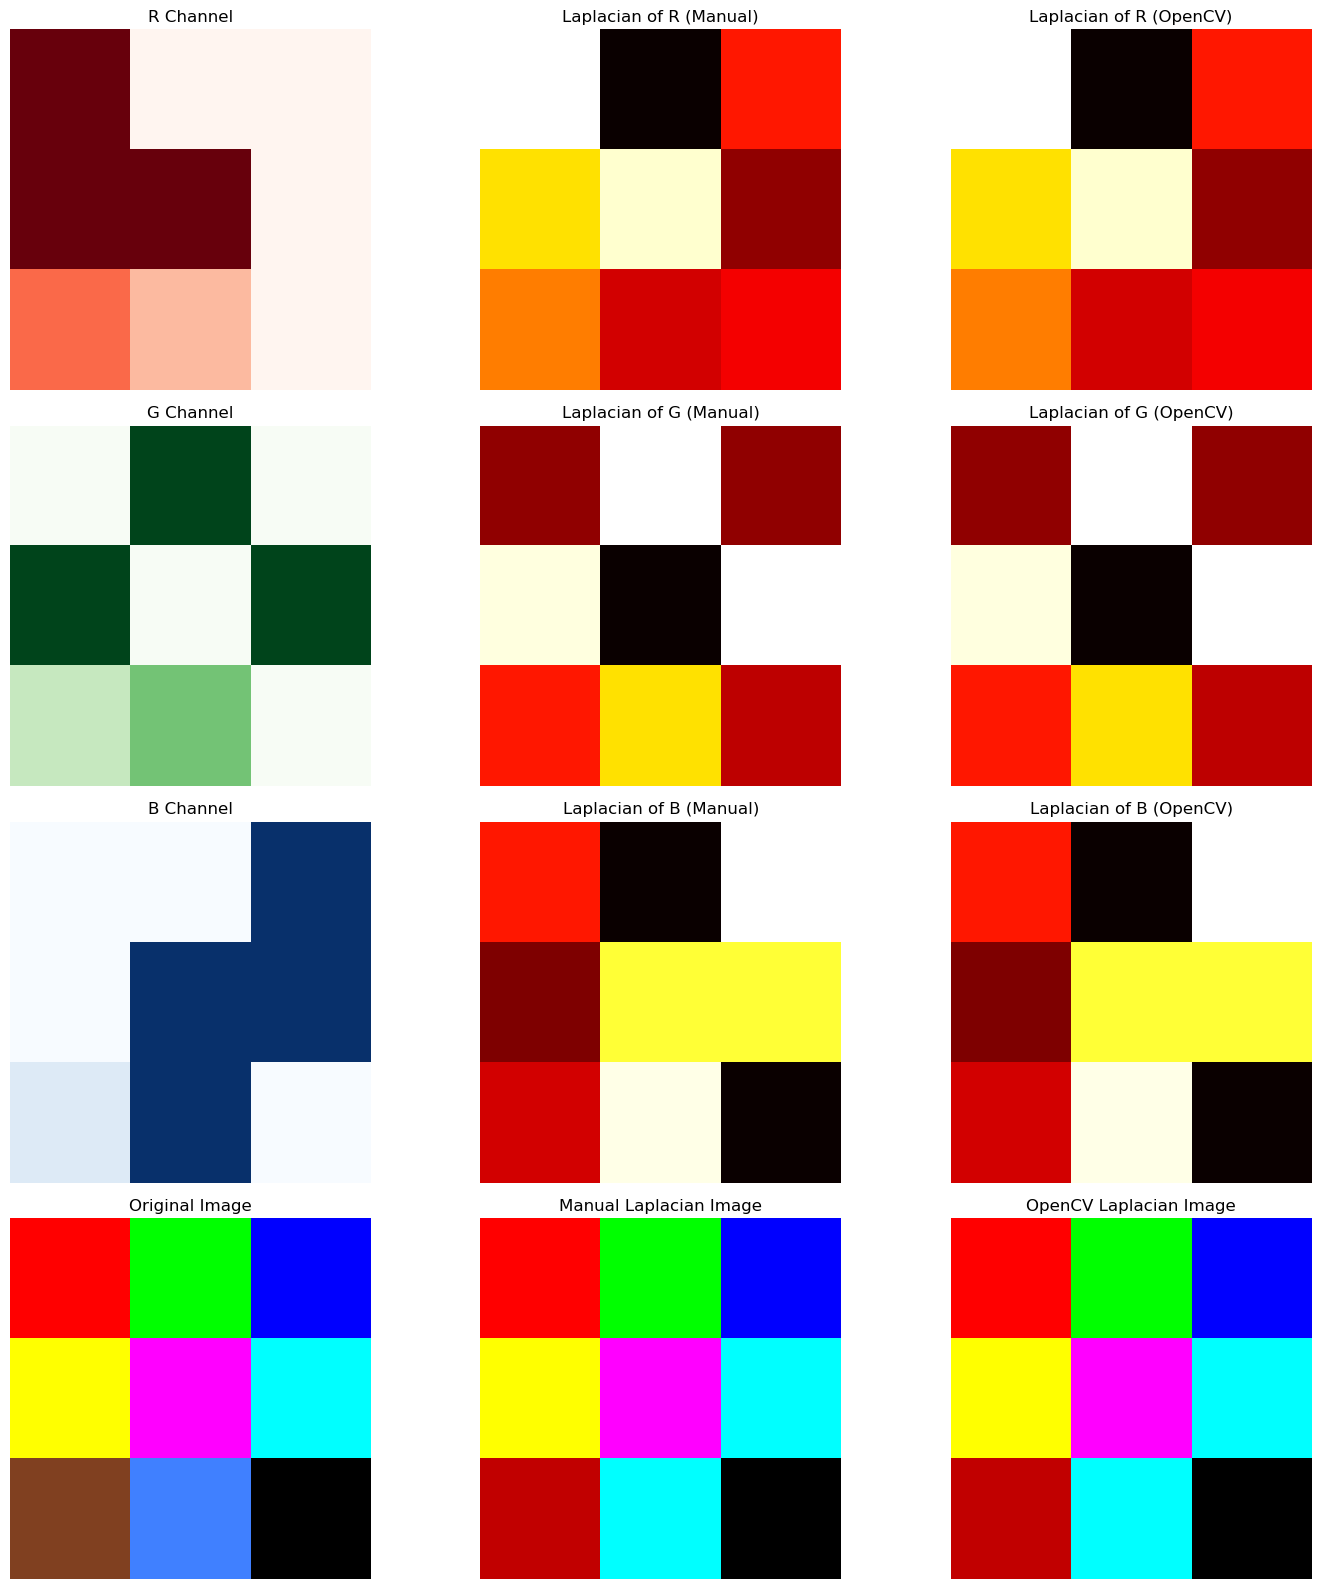

In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create a sample image (3x3) with R, G, B channels
image = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]],
    [[255, 255, 0], [255, 0, 255], [0, 255, 255]],
    [[128, 64, 32], [64, 128, 255], [0, 0, 0]]
], dtype=np.uint8)

# Separate the R, G, B channels
r_channel = image[:, :, 0].astype(np.float32)  # Red channel
g_channel = image[:, :, 1].astype(np.float32)  # Green channel
b_channel = image[:, :, 2].astype(np.float32)  # Blue channel

# Laplacian kernel (3x3)
laplacian_kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], dtype=np.float32)

# Apply zero padding to each channel (pad with zeros)
padded_r = np.pad(r_channel, pad_width=1, mode='constant', constant_values=0)
padded_g = np.pad(g_channel, pad_width=1, mode='constant', constant_values=0)
padded_b = np.pad(b_channel, pad_width=1, mode='constant', constant_values=0)

# Function to manually apply the Laplacian filter to a channel (Including Borders)
def apply_laplacian(channel, kernel, padded_channel):
    height, width = channel.shape
    result = np.zeros_like(channel, dtype=np.float32)  # Ensure the result is of the correct type

    # Iterate over all pixels (including borders)
    for i in range(height):
        for j in range(width):
            # Apply the kernel to the 3x3 region around the pixel (considering padding)
            region = padded_channel[i:i+3, j:j+3]
            result[i, j] = np.sum(region * kernel)
    
    return result

# Apply the manual Laplacian filter to each channel
manual_laplacian_r = apply_laplacian(r_channel, laplacian_kernel, padded_r)
manual_laplacian_g = apply_laplacian(g_channel, laplacian_kernel, padded_g)
manual_laplacian_b = apply_laplacian(b_channel, laplacian_kernel, padded_b)

# OpenCV Laplacian (using filter2D) for each channel
laplacian_cv_r = cv2.filter2D(r_channel.astype(np.float32), -1, laplacian_kernel, borderType=cv2.BORDER_CONSTANT)
laplacian_cv_g = cv2.filter2D(g_channel.astype(np.float32), -1, laplacian_kernel, borderType=cv2.BORDER_CONSTANT)
laplacian_cv_b = cv2.filter2D(b_channel.astype(np.float32), -1, laplacian_kernel, borderType=cv2.BORDER_CONSTANT)

# Combine the channels to get the full image
combined_manual_laplacian = np.stack([manual_laplacian_r, manual_laplacian_g, manual_laplacian_b], axis=-1)
combined_laplacian_cv = np.stack([laplacian_cv_r, laplacian_cv_g, laplacian_cv_b], axis=-1)

# Convert the combined Laplacian images to uint8 for display
combined_manual_laplacian = np.clip(combined_manual_laplacian, 0, 255).astype(np.uint8)
combined_laplacian_cv = np.clip(combined_laplacian_cv, 0, 255).astype(np.uint8)

# Display the results using matplotlib in four rows and three columns
fig, axes = plt.subplots(4, 3, figsize=(15, 16))

# Column 1: Original channels
axes[0, 0].imshow(r_channel, cmap='Reds')
axes[0, 0].set_title("R Channel")
axes[0, 0].axis('off')

axes[1, 0].imshow(g_channel, cmap='Greens')
axes[1, 0].set_title("G Channel")
axes[1, 0].axis('off')

axes[2, 0].imshow(b_channel, cmap='Blues')
axes[2, 0].set_title("B Channel")
axes[2, 0].axis('off')

# Column 2: Laplacian results (Manual)
axes[0, 1].imshow(manual_laplacian_r, cmap='hot')
axes[0, 1].set_title("Laplacian of R (Manual)")
axes[0, 1].axis('off')

axes[1, 1].imshow(manual_laplacian_g, cmap='hot')
axes[1, 1].set_title("Laplacian of G (Manual)")
axes[1, 1].axis('off')

axes[2, 1].imshow(manual_laplacian_b, cmap='hot')
axes[2, 1].set_title("Laplacian of B (Manual)")
axes[2, 1].axis('off')

# Column 3: Laplacian results (OpenCV)
axes[0, 2].imshow(laplacian_cv_r, cmap='hot')
axes[0, 2].set_title("Laplacian of R (OpenCV)")
axes[0, 2].axis('off')

axes[1, 2].imshow(laplacian_cv_g, cmap='hot')
axes[1, 2].set_title("Laplacian of G (OpenCV)")
axes[1, 2].axis('off')

axes[2, 2].imshow(laplacian_cv_b, cmap='hot')
axes[2, 2].set_title("Laplacian of B (OpenCV)")
axes[2, 2].axis('off')

# Last row: Combined image
axes[3, 0].imshow(image)
axes[3, 0].set_title("Original Image")
axes[3, 0].axis('off')

axes[3, 1].imshow(combined_manual_laplacian)
axes[3, 1].set_title("Manual Laplacian Image")
axes[3, 1].axis('off')

axes[3, 2].imshow(combined_laplacian_cv)
axes[3, 2].set_title("OpenCV Laplacian Image")
axes[3, 2].axis('off')

# Set layout for the plots
plt.tight_layout()
plt.show()
